<a href="https://colab.research.google.com/github/abdullohumar/healthcare-dataset-stroke-data/blob/main/predictiveanalyticsmahir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load data


In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdullohumar1","key":"8ac0c29786d4758373ac87a8095a3a7c"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download --force -d godfatherfigure/healthcare-dataset-stroke-data

Dataset URL: https://www.kaggle.com/datasets/godfatherfigure/healthcare-dataset-stroke-data
License(s): unknown
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 246MB/s]


In [4]:
import zipfile

with zipfile.ZipFile('/content/healthcare-dataset-stroke-data.zip', 'r') as zip_ref:
    zip_ref.extractall('stroke_dataset')

In [5]:
import os
os.listdir('stroke_dataset')

['healthcare-dataset-stroke-data.csv']

In [6]:
import pandas as pd

df = pd.read_csv('/content/stroke_dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Cleaning dataset

In [12]:
df = df.dropna()
df = df.drop(columns=['id'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


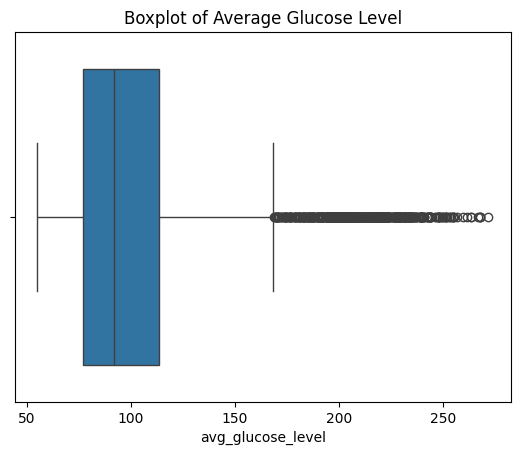

In [13]:
# menangani outliers
import seaborn as sns
# kita lihat dulu pakai ilustrasi
import matplotlib.pyplot as plt

sns.boxplot(x='avg_glucose_level', data=df)
plt.title('Boxplot of Average Glucose Level')
plt.show()

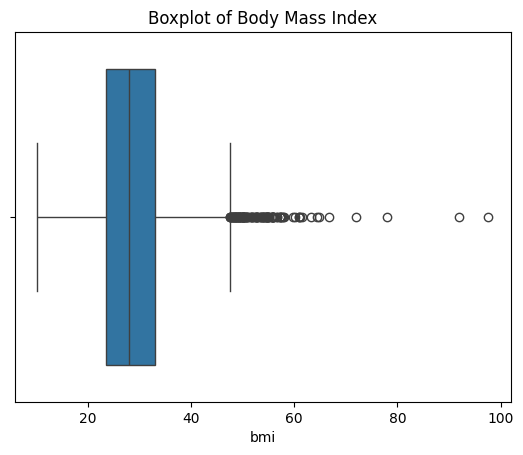

In [14]:
sns.boxplot(x='bmi', data=df)
plt.title('Boxplot of Body Mass Index')
plt.show()

## Data Preparation

In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Salin df biar gak ngubah aslinya
df_encoded = df.copy()

# 1. Label encoding untuk binary
label_cols = ['gender', 'ever_married', 'Residence_type']
le = LabelEncoder()

for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 2. One-hot encoding untuk kolom dengan lebih dari 2 kategori
df_encoded = pd.get_dummies(df_encoded, columns=['work_type', 'smoking_status'], drop_first=True)

# Hasil akhir
df_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,True,False,False
2,1,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,True,False
3,0,49.0,0,0,1,1,171.23,34.4,1,False,True,False,False,False,False,True
4,0,79.0,1,0,1,0,174.12,24.0,1,False,False,True,False,False,True,False
5,1,81.0,0,0,1,1,186.21,29.0,1,False,True,False,False,True,False,False


In [16]:
# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns=['stroke'])  # Semua kolom kecuali target
y = df_encoded['stroke']                # Target variabel

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4909
Total # of sample in train dataset: 3927
Total # of sample in test dataset: 982


## Model Development

In [19]:
# Model Development
models = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['KNN', 'RandomForest', 'Boosting'])
# 1. K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse', 'KNN'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)
models


,KNN,RandomForest,Boosting
train_mse,0.033784,NaN,NaN
test_mse,NaN,NaN,NaN


In [20]:
# 2. RandomForest
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=42, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)
models

,KNN,RandomForest,Boosting
train_mse,0.033784,0.006032,NaN
test_mse,NaN,NaN,NaN


In [21]:
#  3. Boosting Algorthm
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=42)
boosting.fit(X_train, y_train)
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)
models

,KNN,RandomForest,Boosting
train_mse,0.033784,0.006032,0.040645
test_mse,NaN,NaN,NaN


In [22]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algorihm
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN':knn, 'RF':RF, 'Boosting':boosting}

# hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

# panggil mse
mse

,train,test
KNN,0.033784,0.040998
RF,0.006032,0.044538
Boosting,0.040645,0.043996


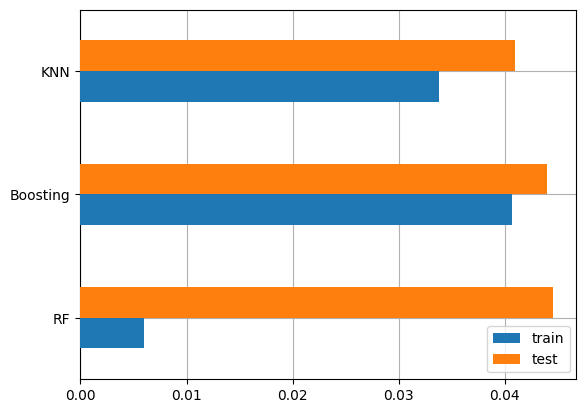

In [23]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [24]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
4951,0,0.0,0.0,0.0
